In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Решение систем нелинейных алгебраических уравнений

Дана система уравнений $Ax=b$ порядка $n$. Исследовать зависимость погрешности решения $x$ от погрешностей правой части системы $b$.

In [539]:
def find_matrix(n):
    N = 9
    C = []
    for i in range(1, n+1):
        for j in range(1, n+1):
            C.append(0.1 * N * i * j)
    A = [3 / (1 + c)**2 for c in C]
    A = np.reshape(A, (n, n))
    return np.array(A)

In [659]:
A = find_matrix(5)

b = [9] * 5

In [534]:
x = np.linalg.solve(A, b)
print('Решение СЛАУ: ', x)

Решение СЛАУ:  [    28611.58172897  -1307278.05534032   9979537.72861096
 -22626051.2231438   15099002.72111442]


In [535]:
print('Число обусловленности матрицы: ', np.linalg.cond(A, 2))

Число обусловленности матрицы:  82531213.63648272


In [131]:
X = []
d = []

for i in range(1, n+1):
    bj = [b[j]+0.01 if j==i-1 else b[j] for j in range(len(b))]
    X.append(np.linalg.solve(A, bj))
    d.append((np.linalg.norm(x - X[i-1], 2)) / np.linalg.norm(X[i-1], 2))

print('Вектор d: ', d)

Вектор d:  [2.1993248924422867e-05, 0.0011179583551645595, 0.008773112033230987, 0.02088330126178449, 0.013623052152092054]


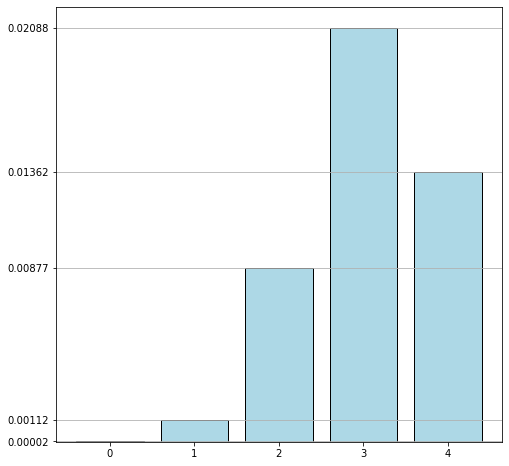

In [132]:
plt.figure(figsize=(8, 8))
plt.bar(np.arange(5), d, color='lightblue', edgecolor='black')
plt.grid(axis='y')
plt.yticks(d)
plt.show()

In [661]:
np.linalg.cond(A) * np.linalg.norm(b - np.array([9, 9, 9, 9.01, 9]), 2) / np.linalg.norm(b, 2)

41010.089768162004

In [660]:
print('Теоретическая погрешность: ', np.linalg.norm(x - X[3], 2) / np.linalg.norm(x, 2))

Теоретическая погрешность:  0.020456129246650787


Дана система уравнений $Ax=b$ порядка $n$ с симметричной положительно определенной матрицей $A$. Решить систему методом Холецкого.

In [675]:
n = 30
m = 9
A = []

for i in range(1, n+1):
    for j in range(1, n+1):
        if i == j:
            A.append(n + m**2 + j / m + i / n)
        elif i != j:
            A.append((i + j) / (n + m))
            
A = np.reshape(A, (n, n))


In [676]:
b = []

for i in range(1, n+1):
    b.append(i**2 - 100)

In [678]:
L = np.linalg.cholesky(A)

In [157]:
# np.dot(L, L.T)

In [162]:
y = np.linalg.solve(L, b)

In [680]:
x = np.linalg.solve(L.T, y)
x

array([-1.19421606, -1.17628984, -1.14042087, -1.08665417, -1.01503464,
       -0.92560698, -0.81841578, -0.69350547, -0.55092032, -0.39070448,
       -0.21290192, -0.01755648,  0.19528813,  0.42558837,  0.67330083,
        0.93838226,  1.22078953,  1.52047967,  1.83740985,  2.17153737,
        2.52281968,  2.89121438,  3.27667918,  3.67917196,  4.09865073,
        4.53507363,  4.98839893,  5.45858506,  5.94559058,  6.44937417])

In [164]:
np.linalg.solve(A, b)

array([-1.19421606, -1.17628984, -1.14042087, -1.08665417, -1.01503464,
       -0.92560698, -0.81841578, -0.69350547, -0.55092032, -0.39070448,
       -0.21290192, -0.01755648,  0.19528813,  0.42558837,  0.67330083,
        0.93838226,  1.22078953,  1.52047967,  1.83740985,  2.17153737,
        2.52281968,  2.89121438,  3.27667918,  3.67917196,  4.09865073,
        4.53507363,  4.98839893,  5.45858506,  5.94559058,  6.44937417])

Исследовать зависимость числа обусловленности матрицы $A$ из задачи первой от порядка $n$ матрицы.

In [710]:
def LU(a, m, step):
    n = a.shape[0]
    U = np.matrix(np.zeros([n, n]))
    L = np.matrix(np.zeros([n, n]))
    for i in range(n):
        for j in range(n):
            L[i, step-1] = a[i, step-1] / a[step-1, step-1]
            U[i, j] = a[i, j] - (a[i, step-1] / a[step-1, step-1]) * a[step-1, j]
            for k in range(step):
                U[k] = a[k]
        U[i+1:, i] = 0
        m[i, i] = 1
        m[i, i+1:] = 0
    m[k+1:, k] = L[k+1:, k]
    L = m
    return (U, L)

In [711]:
def find_LU(n):
    b = find_matrix(n)
    m = np.matrix(np.zeros([b.shape[0], b.shape[0]]))
    for i in range(1, b.shape[0]+1):
        b, m = LU(b, m, i)
    L, U = m, b
    return (L, U)

In [719]:
def E(n):
    a = np.array(np.zeros([n, n]))
    for i in range(len(a)):
        a[i, i] = 1
    return a

In [723]:
def find_inv(n):
    inv = []
    for elem in E(n):
        L, U = find_LU(n)
        inv.append(np.linalg.solve(L@U, elem))
    return inv

In [738]:
inv = []

for N in range(1, 100):
    if np.linalg.det(find_matrix(N)) != 0:
        inv.append(find_inv(N))
        print(f'Обратная матрица размера {N}:', find_inv(N))
        print('-'*20)
    else: 
        break

Обратная матрица размера 1: [array([1.20333333])]
--------------------
Обратная матрица размера 2: [array([-4.95668177, 13.37798293]), array([ 13.37798293, -29.05356958])]
--------------------
Обратная матрица размера 3: [array([  11.85504287, -113.64906655,  158.05710573]), array([ -113.64906655,   930.74512142, -1194.25747351]), array([  158.05710573, -1194.25747351,  1485.98964178])]
--------------------
Обратная матрица размера 4: [array([  -22.06182696,   576.47263748, -2325.43450507,  2174.79734732]), array([   576.47263748, -13111.46952738,  49338.45592123, -44251.57329541]), array([  -2325.43450507,   49338.45592123, -180362.47136666,
        159244.9714329 ]), array([   2174.79734732,  -44251.57329541,  159244.9714329 ,
       -139451.06153792])]
--------------------
Обратная матрица размера 5: [array([ 3.54792245e+01, -2.28068534e+03,  2.01275702e+04, -4.94869391e+04,
        3.47836396e+04]), array([-2.28068534e+03,  1.28758578e+05, -1.06554874e+06,  2.52097340e+06,
       -

In [740]:
print('максимально возможное значение, при котором удается решить задачу:', N-1)

максимально возможное значение, при котором удается решить задачу: 14


In [745]:
a = []

for i in range(1, N):
    a.append(find_matrix(i))

In [747]:
cond = []
for i in range(len(inv)):
    cond.append(np.linalg.norm(a[i]) * np.linalg.norm(inv[i]))
    print(f'Число обусловленности матрицы для n = {i+1}:', cond[i])

Число обусловленности матрицы для n = 1: 0.9999999999999999
Число обусловленности матрицы для n = 2: 35.08523605831172
Число обусловленности матрицы для n = 3: 2583.21847921955
Число обусловленности матрицы для n = 4: 359437.098071269
Число обусловленности матрицы для n = 5: 82650307.76639797
Число обусловленности матрицы для n = 6: 28536745510.90572
Число обусловленности матрицы для n = 7: 13833333011998.83
Число обусловленности матрицы для n = 8: 9010123308360926.0
Число обусловленности матрицы для n = 9: 2.26455419262447e+18
Число обусловленности матрицы для n = 10: 3.2691495848282706e+19
Число обусловленности матрицы для n = 11: 5.109686309403138e+19
Число обусловленности матрицы для n = 12: 1.5070496486717022e+19
Число обусловленности матрицы для n = 13: 2.716135851903082e+19
Число обусловленности матрицы для n = 14: 2.5434169815446295e+19


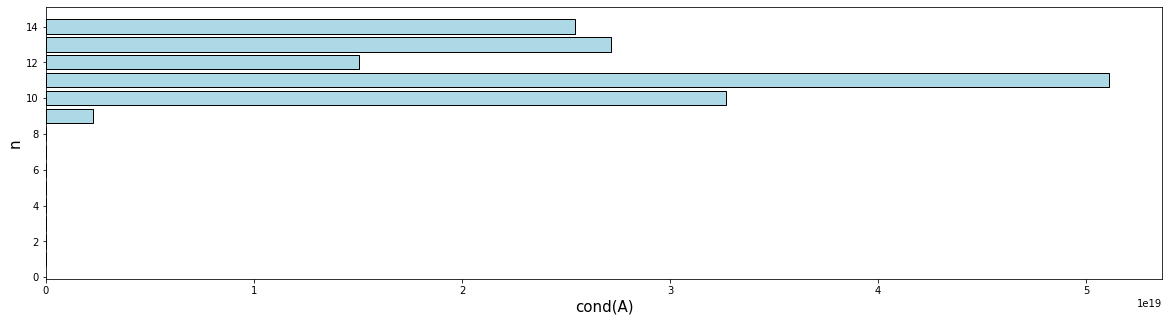

In [751]:
plt.figure(figsize=(20,5))
plt.barh(np.arange(1, 15), cond, color='lightblue', edgecolor='black')
# plt.xticks(cond)
plt.xlabel('cond(A)', fontsize=15)
plt.ylabel('n', fontsize=15)
plt.show()